# Logistic Regression

## Importing the libraries

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [86]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Analyze the dataset and look at the first five rows.


## Splitting the dataset into the Training set and Test set

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Logistic Regression model on the Training set

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [90]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84  3]
 [ 3 47]]


0.9562043795620438

<AxesSubplot:>

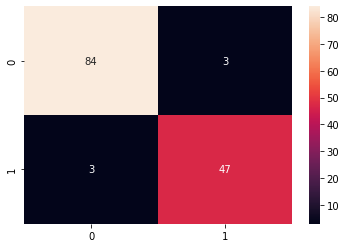

In [94]:
import seaborn as sns
sns.heatmap(cm, annot=True)

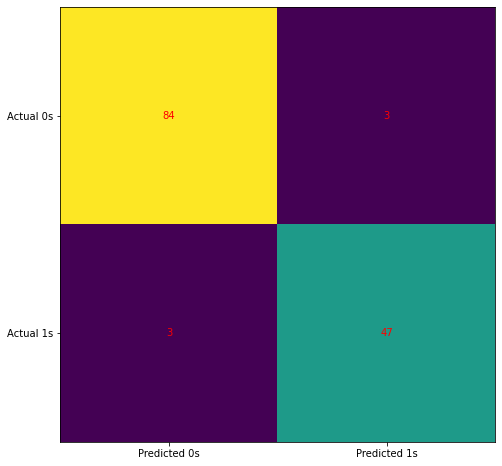

In [95]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Computing the accuracy with k-Fold Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.89 %
Standard Deviation: 1.85 %
